Special case of expectation maximization algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, n_features=2, centers=5, random_state=6)

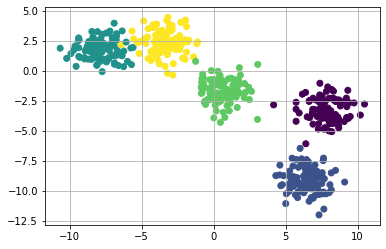

In [3]:
plt.figure(0)
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = y)
plt.show()

## Initialize cluster centers randomly

In [4]:
k = 5
color = ['green', 'red', 'blue', 'yellow', 'orange']
clusters = {}
for i in range(k) :
    center = 10 * (2 * np.random.random((X.shape[1],)) - 1) # generates random points
    points = []
    cluster = {
        'center': center,
        'points': points,
        'color': color[i]
    }
    clusters[i] = cluster

In [5]:
clusters

{0: {'center': array([1.05352741, 6.09796619]),
  'points': [],
  'color': 'green'},
 1: {'center': array([-4.02231441,  4.62151889]),
  'points': [],
  'color': 'red'},
 2: {'center': array([7.61971139, 8.95133947]), 'points': [], 'color': 'blue'},
 3: {'center': array([-8.07493642, -1.10748775]),
  'points': [],
  'color': 'yellow'},
 4: {'center': array([-7.1648172 ,  1.98692494]),
  'points': [],
  'color': 'orange'}}

## Assign each point to its nearest center (E(expectation) step)

In [6]:
def distance(v1, v2) :
    return np.sqrt(np.sum((v1 - v2)**2))

In [7]:
# distance(np.array([1, 2]), np.array([3, 5]))

In [8]:
def assignPointToClusters(clusters) :
    for ix in range(X.shape[0]) :
        dist = []
        curr_x = X[ix]

        for kx in range(k) :
            d = distance(curr_x, clusters[kx]['center'])
            dist.append(d)

        current_cluster = np.argmin(dist)
        clusters[current_cluster]['points'].append(curr_x)

## Update clusters (M(maximization) step)

In [9]:
def plotClusters(clusters) :
    for kx in range(k) :
        print(len(clusters[kx]['points']))
        pts = np.array(clusters[kx]['points'])
        # Plot points
        try :
            plt.scatter(pts[:, 0], pts[:, 1], color = clusters[kx]['color'])
        except :
            pass
        # Plot cluster centers
        uk = clusters[kx]['center'] # mu(k)
        plt.scatter(uk[0], uk[1], color = 'black', marker = 'x')

In [10]:
def updateClusters(clusters) : # M-step -> We update every cluster center according to the mean of the points in it
    for kx in range(k) :
        pts = np.array(clusters[kx]['points'])
        if pts.shape[0] > 0 :
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u
            clusters[kx]['points'] = []
    return clusters

212
124
11
42
111


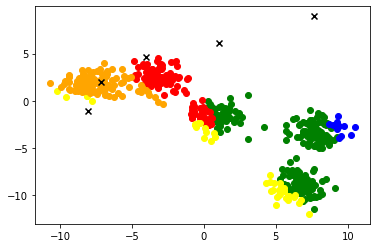

In [11]:
assignPointToClusters(clusters)
plotClusters(clusters)

101
100
98
100
101


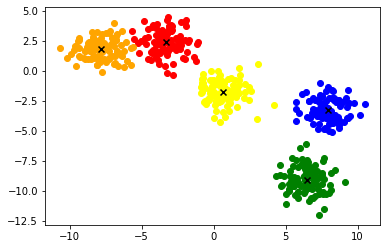

In [23]:
updateClusters(clusters)
assignPointToClusters(clusters)
plotClusters(clusters)

## Converges to local minima since cost function is not convex